In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../machine_learning')
sys.path.insert(1, '../markets')

import utils
import importlib

In [2]:
parameters = {'targetCurrencyPairList': ["BTC_ETH"],
              'featureCurrencyPairList': ["BTC_ETH", "USDT_BTC"],
              'samplingFrequency':'30s',
              'quantityList':['close', 'volume'],
              'tradingPeriodList':['5min'],
              'thresholdList':[0.007],
              'nWindowsCloseList':[2],
              'nWindowsVolumeList':[2],
              'nPeriodReturnCloseList':[4],
              'nPeriodReturnVolumeList':[4],
              'nPeriodReturnMovAvCloseList':[100],
              'nPeriodReturnMovAvVolumeList':[100]}

In [3]:
startDate = '2017-11-01-00:00:00'
endDate = '2017-11-23-02:00:00'

#endDate = '2017-05-02-02:00:00'

inputDirectory = '../input/poloniex/'

XList = []
for currencyPair in parameters['featureCurrencyPairList']:
    filename = currencyPair + '.csv'
    print(filename)
    dataFrameTemp = pd.read_csv(inputDirectory+filename, header=[0, 1], index_col=[0])
    XList.append(dataFrameTemp[startDate:endDate])

BTC_ETH.csv
USDT_BTC.csv


In [5]:
XList = [pd.read_csv("./BTC_ETH_test.csv", header=[0, 1], index_col=[0])]

In [6]:
print(XList[0]['2017-05-02 07:16:00':])

                          BTC_ETH                                        \
                           amount globalTradeID      rate         total   
date                                                                      
2017-05-02 07:16:03  7.373740e-02     117089384  0.054276  4.002170e-03   
2017-05-02 07:16:20  1.468849e-01     117089480  0.054494  8.004330e-03   
2017-05-02 07:16:23  1.340000e+02     117089486  0.054494  7.302183e+00   
2017-05-02 07:16:29  8.531000e-01     117089506  0.054494  4.648874e-02   
2017-05-02 07:16:32  1.511000e-05     117089528  0.054494  8.200000e-07   
2017-05-02 07:16:32  1.000000e-01     117089529  0.054276  5.427610e-03   
2017-05-02 07:16:32  5.470647e-02     117089530  0.054276  2.969250e-03   
2017-05-02 07:16:33  5.000000e-01     117089533  0.054494  2.724700e-02   
2017-05-02 07:16:33  5.050259e+00     117089534  0.054494  2.752088e-01   
2017-05-02 07:16:35  2.947765e+00     117089543  0.054494  1.606355e-01   
2017-05-02 07:16:35  1.50

In [22]:
X = XList[0]

print(XList)
base = X.index[-1].second+0.1
X_feature = X.BTC_ETH.amount.resample('30s', closed='left', loffset='30s', base=base).last()

print(X_feature)

[                          BTC_ETH                                        \
                           amount globalTradeID      rate         total   
date                                                                      
2017-05-02 00:00:02  2.706895e-02     116891054  0.053039  1.435700e-03   
2017-05-02 00:00:03  3.000000e-01     116891066  0.053039  1.591163e-02   
2017-05-02 00:00:04  1.884037e-02     116891085  0.053078  9.999900e-04   
2017-05-02 00:00:04  5.409841e-02     116891084  0.053077  2.871400e-03   
2017-05-02 00:00:04  1.452854e+00     116891086  0.053078  7.711390e-02   
2017-05-02 00:00:05  1.037919e+00     116891090  0.053078  5.509016e-02   
2017-05-02 00:00:05  4.682690e+01     116891092  0.053078  2.485456e+00   
2017-05-02 00:00:06  5.233087e-01     116891103  0.053039  2.775566e-02   
2017-05-02 00:00:09  8.976350e-02     116891171  0.053039  4.760940e-03   
2017-05-02 00:00:09  1.508831e-02     116891172  0.053021  7.999900e-04   
2017-05-02 00:00:09  2.7

In [18]:
import dataSampler as dS
importlib.reload(dS)

currencyPairList = parameters['featureCurrencyPairList']
currencyPairList = ["BTC_ETH"]
closePrice = dS.DataSampler(currencyPairList, 
                            parameters['samplingFrequency'], ['volume']).transform(XList)
print(closePrice.loc[closePrice.index[1:]])

                             BTC_ETH
                              volume
date                                
2017-11-02 00:00:54.100   234.347992
2017-11-02 00:01:24.100    37.870131
2017-11-02 00:01:54.100    78.657203
2017-11-02 00:02:24.100   229.068743
2017-11-02 00:02:54.100   188.223402
2017-11-02 00:03:24.100   314.549990
2017-11-02 00:03:54.100   205.569617
2017-11-02 00:04:24.100   462.246421
2017-11-02 00:04:54.100   116.995287
2017-11-02 00:05:24.100    79.976921
2017-11-02 00:05:54.100   271.732151
2017-11-02 00:06:24.100    18.912415
2017-11-02 00:06:54.100    36.818816
2017-11-02 00:07:24.100    61.702302
2017-11-02 00:07:54.100    32.640442
2017-11-02 00:08:24.100    73.915211
2017-11-02 00:08:54.100    10.399740
2017-11-02 00:09:24.100    20.971383
2017-11-02 00:09:54.100    20.424647
2017-11-02 00:10:24.100     6.105398
2017-11-02 00:10:54.100   272.257248
2017-11-02 00:11:24.100    31.042818
2017-11-02 00:11:54.100     0.957960
2017-11-02 00:12:24.100    46.552165
2

In [19]:
print(closePrice[closePrice.values == 2e-8])
print(closePrice[closePrice.values == 2e-8].shape)
print(closePrice.min())

                              BTC_ETH
                               volume
date                                 
2017-11-05 19:42:24.100  2.000000e-08
2017-11-08 04:51:54.100  2.000000e-08
2017-11-14 17:07:54.100  2.000000e-08
2017-11-15 08:34:24.100  2.000000e-08
2017-11-15 09:19:24.100  2.000000e-08
2017-11-15 09:26:54.100  2.000000e-08
2017-11-18 06:28:54.100  2.000000e-08
2017-11-18 20:29:54.100  2.000000e-08
2017-11-20 00:23:54.100  2.000000e-08
2017-11-20 00:37:24.100  2.000000e-08
2017-11-20 00:42:24.100  2.000000e-08
2017-11-21 11:35:54.100  2.000000e-08
2017-11-22 09:49:24.100  2.000000e-08
(13, 1)
BTC_ETH  volume    1.000000e-08
dtype: float64


In [6]:
import classifier as clf
importlib.reload(clf)

classifier = clf.Classifier(**parameters)

preprocessed = classifier.preprocessingPipeline.transform(closePrice)
print(np.isinf(preprocessed.values).sum())

features = classifier.featurePipeline.transform(preprocessed)
print(np.isinf(features.values).sum())

0
0


../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  nMovingAverage = pd.rolling_mean(X, window=n)


In [7]:
print(features[features.values == np.inf])
print(features[features.values == np.inf].shape)

Empty DataFrame
Columns: [(BTC_XRP, volume_return_4), (BTC_XRP, volume_mov_av_2_return_100)]
Index: []
(0, 2)


In [8]:
selectedT = pd.Timestamp('2017-10-19 04:13:50.100')
print(features.loc[selectedT, :])

deltanT = pd.Timedelta('50min')
previousnT = selectedT - deltanT

print(preprocessed.loc[previousnT, :])
print(preprocessed.loc[selectedT, :])

deltaT = pd.Timedelta('30s')
previousT = selectedT - deltaT
print(closePrice.loc[previousT, :])
print(closePrice.loc[selectedT, :])

print(closePrice.loc[previousnT-deltaT, :])
print(closePrice.loc[previousnT, :])



BTC_XRP  volume_return_4              -9.855537e-01
         volume_mov_av_2_return_100    3.699552e+11
Name: 2017-10-19 04:13:50.100000, dtype: float64
BTC_XRP  volume             1.000000e-08
         volume_mov_av_2    1.130138e-08
Name: 2017-10-19 03:23:50.100000, dtype: float64
BTC_XRP  volume             1812.602674
         volume_mov_av_2    4181.004987
Name: 2017-10-19 04:13:50.100000, dtype: float64
BTC_XRP  volume    6549.4073
Name: 2017-10-19 04:13:20.100000, dtype: float64
BTC_XRP  volume    1812.602674
Name: 2017-10-19 04:13:50.100000, dtype: float64
BTC_XRP  volume    1.000000e-08
Name: 2017-10-19 03:23:20.100000, dtype: float64
BTC_XRP  volume    1.000000e-08
Name: 2017-10-19 03:23:50.100000, dtype: float64


In [10]:
import classifier as clf
importlib.reload(clf)

classifier = clf.Classifier(**parameters)
classifier.fit(XList)

../machine_learning/dataSampler.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X.drop_duplicates(inplace=True)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  nMovingAverage = pd.rolling_mean(X, window=n)
../machine_learning/dataSampler.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X.drop_duplicates(inplace=True)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ro

X:                                 BTC_ETH       USDT_BTC         BTC_ETH  \
                        close_return_4 close_return_4 volume_return_4   
date                                                                    
2017-11-02 00:50:54.100      -0.000024       0.000788        2.131707   
2017-11-02 00:51:24.100      -0.000013       0.001378        9.862962   
2017-11-02 00:51:54.100      -0.004210      -0.000524        1.034132   
2017-11-02 00:52:24.100      -0.001138       0.000590       -0.693400   
2017-11-02 00:52:54.100      -0.007060       0.000295        2.514621   
2017-11-02 00:53:24.100      -0.004206       0.001621       -0.537957   
2017-11-02 00:53:54.100      -0.000503       0.002802        0.402334   
2017-11-02 00:54:24.100      -0.003812       0.002209        0.194667   
2017-11-02 00:54:54.100      -0.005210       0.002211        0.037536   
2017-11-02 00:55:24.100      -0.005164       0.000294        0.221964   
2017-11-02 00:55:54.100      -0.003343      -0.

/home/rookstar/anaconda3/envs/altcoin/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/home/rookstar/anaconda3/envs/altcoin/lib/python3.6/site-packages/sklearn/pipeline.py:259: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Classifier(featureCurrencyPairList=None, nPeriodReturnCloseList=None,
      nPeriodReturnMovAvCloseList=None, nPeriodReturnMovAvVolumeList=None,
      nPeriodReturnVolumeList=None, nWindowsCloseList=None,
      nWindowsVolumeList=None, quantityList=None, samplingFrequency=None,
      targetCurrencyPairList=None, thresholdList=None,
      tradingPeriodList=None)

In [20]:
def getTradeListFromCSV(currencyPairs, startDate, endDate, Input_path = '../input/raw/30sec/'):
    dataframeReturn = pd.read_csv("./BTC_ETH_test.csv", header=[0, 1], index_col=[0])
    
    dataframeReturn = dataframeReturn.loc[startDate:endDate, currencyPairs]
    
    return dataframeReturn

In [3]:
currencyPair = ['BTC_ETH']

startDate = '2017-05-01 00:00:00'
endDate = '2017-05-01 00:10:00'

dates = pd.date_range(startDate, endDate)

In [4]:
inputTradeList = getTradeListFromCSV(currencyPair, startDate, endDate)
print(inputTradeList)

                        BTC_ETH                                        \
date                     amount globalTradeID      rate         total   
2017-05-01 00:00:00    1.857413     115850540  0.058100  1.079157e-01   
2017-05-01 00:00:02    0.001050     115850565  0.058100  6.100000e-05   
2017-05-01 00:00:04    3.482034     115850584  0.058240  2.027936e-01   
2017-05-01 00:00:04    0.017170     115850583  0.058240  1.000000e-03   
2017-05-01 00:00:06    0.000140     115850607  0.058240  8.120000e-06   
2017-05-01 00:00:06    1.066083     115850600  0.058240  6.208868e-02   
2017-05-01 00:00:07    0.000003     115850620  0.058240  1.500000e-07   
2017-05-01 00:00:07   12.000000     115850610  0.058240  6.988799e-01   
2017-05-01 00:00:08   17.169663     115850626  0.058240  9.999610e-01   
2017-05-01 00:00:10   50.000000     115850645  0.058240  2.912000e+00   
2017-05-01 00:00:10   63.837918     115850643  0.058240  3.717920e+00   
2017-05-01 00:00:10    0.934886     115850644  0.05

In [19]:
import dataSampler as dS
importlib.reload(dS)

samplingFrequency = '30s'
nPeriodMax =2
closePrice = dS.DataSampler(currencyPair, samplingFrequency, ['close']).transform([inputTradeList])
startTime = closePrice.index[0]
endTime = startTime + nPeriodMax * pd.Timedelta(samplingFrequency)

print(startTime)
print(endTime)
pd.to_datetime('now')

2017-05-01 00:00:30
2017-05-01 00:01:30


Timestamp('2018-01-01 10:27:22')

In [5]:
import targetPipeline as tP
importlib.reload(tP)

listX = [inputTradeList]
X = inputTradeList

transformer = tP.TargetPipeline(currencyPairList=['BTC_ETH'], 
                                tradingPeriodList=['1min'], 
                                thresholdList=[0.0001])

transformer.fit(listX)
X_transformed_tTT = transformer.transform(listX)
print(X_transformed_tTT)


                                            BTC_ETH
                    close_return_2_threshold_0.0001
2017-05-01 00:01:30                             1.0
2017-05-01 00:02:00                             0.0
2017-05-01 00:02:30                             1.0
2017-05-01 00:03:00                             1.0
2017-05-01 00:03:30                             0.0
2017-05-01 00:04:00                             0.0
2017-05-01 00:04:30                             0.0
2017-05-01 00:05:00                             0.0
2017-05-01 00:05:30                             0.0
2017-05-01 00:06:00                             1.0
2017-05-01 00:06:30                             1.0
2017-05-01 00:07:00                             0.0
2017-05-01 00:07:30                             1.0
2017-05-01 00:08:00                             1.0
2017-05-01 00:08:30                             1.0
2017-05-01 00:09:00                             0.0


In [10]:
import classifier as c
importlib.reload(c)

listX = [inputTradeList]
X = inputTradeList

transformer = c.Classifier(currencyPairList=['BTC_ETH'],
                           samplingFrequency='30s',
                           quantityList=['close', 'volume'],
                           tradingPeriodList=['1min'], 
                           thresholdList=[0.0001],
                           nWindowsCloseList=[3], 
                           nWindowsVolumeList=[2],
                           nPeriodReturnCloseList=[1], 
                           nPeriodReturnVolumeList=[1],
                           nPeriodReturnMovAvCloseList=[5], 
                           nPeriodReturnMovAvVolumeList=[5])

transformer.fit(listX)
X_transformed_c = transformer.transform(listX)
print(X_transformed_c)

../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  nMovingAverage = pd.rolling_mean(X, window=n)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  nMovingAverage = pd.rolling_mean(X, window=n)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  nMovingAverage = pd.rolling_mean(X, window=n)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  nMovingAverage = pd.rolling_me

                           BTC_ETH                                          \
                    close_return_1 volume_return_1 close_mov_av_3_return_5   
2017-05-01 00:04:00       0.000198       -0.204158                0.002222   
2017-05-01 00:04:30      -0.000198        2.410910                0.001523   
2017-05-01 00:05:00       0.000257        0.669362                0.001436   
2017-05-01 00:05:30      -0.000172       -0.793010                0.000712   
2017-05-01 00:06:00      -0.000172        0.290007                0.000655   
2017-05-01 00:06:30      -0.001533       -0.159448               -0.000578   
2017-05-01 00:07:00       0.002393        3.322708               -0.000378   
2017-05-01 00:07:30      -0.002223       -0.391081               -0.000919   
2017-05-01 00:08:00       0.000217        0.562840               -0.000754   
2017-05-01 00:08:30       0.002275        0.017150               -0.000637   
2017-05-01 00:09:00       0.000249       -0.435125              

/home/rookstar/anaconda3/envs/altcoin/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/home/rookstar/anaconda3/envs/altcoin/lib/python3.6/site-packages/sklearn/pipeline.py:259: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  nMovingAverage = pd.rolling_mean(X, window=n)
../machine_learning/nMovingAverager.py:94: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, 

In [79]:
import dataSamplingTransformer as dST
importlib.reload(dST)

listX = [inputTradeList]
X = inputTradeList
transformer = dST.DataSamplingTransformer(currencyPairList=['BTC_ETH'], 
                                      samplingFrequency='30s', 
                                      quantityList=['close', 'top', 'volume', 'volume_buy'
                                                    #, 'high','low', 'average'
                                                   ])

transformer.fit(listX)
X_transformed_dST = transformer.transform(listX)
print(X_transformed_dST)

ValueError: Quantity not supported.

In [13]:
thresholdList = [0.001, 0.5]
tradingPeriodList = ['2min', '5min']
pipelines = [item for sublist in [['target_'+tradingPeriod+'_'+str(threshold) for tradingPeriod in tradingPeriodList] for threshold in thresholdList] for item in sublist]

print(pipelines)

['target_2min_0.001', 'target_5min_0.001', 'target_2min_0.5', 'target_5min_0.5']


In [12]:
import nPeriodsReturnTransformer as nPRT
importlib.reload(nPRT)

X = X_transformed_dST

transformer = nPRT.NPeriodsReturnTransformer(nPeriodsList=[1,2,3])

transformer.fit(X)
X_transformed_nPRT = transformer.transform(X)
print(X_transformed_nPRT)

                           BTC_ETH                              
                    close_return_1 close_return_2 close_return_3
2017-05-01 00:02:00       0.002058   2.058319e-03       0.002179
2017-05-01 00:02:30      -0.001538   5.168096e-04       0.000517
2017-05-01 00:03:00       0.001542   1.711743e-06       0.002060
2017-05-01 00:03:30       0.000084   1.626261e-03       0.000085
2017-05-01 00:04:00       0.000198   2.819235e-04       0.001825
2017-05-01 00:04:30      -0.000198   1.711596e-07       0.000084
2017-05-01 00:05:00       0.000257   5.869612e-05       0.000257
2017-05-01 00:05:30      -0.000172   8.506632e-05      -0.000113
2017-05-01 00:06:00      -0.000172  -3.432580e-04      -0.000087
2017-05-01 00:06:30      -0.001533  -1.703920e-03      -0.001875
2017-05-01 00:07:00       0.002393   8.568992e-04       0.000685
2017-05-01 00:07:30      -0.002223   1.650940e-04      -0.001368
2017-05-01 00:08:00       0.000217  -2.005815e-03       0.000382
2017-05-01 00:08:30      

In [25]:
import nMovingAverageTransformer as nMAT
importlib.reload(nMAT)

X = X_transformed_dST
print(X)

transformer = nMAT.NMovingAverageTransformer(quantity = 'volume', nWindowsList=[1,2,3])

transformer.fit(X)
X_transformed_nMAT = transformer.transform(X)
print(X_transformed_nMAT)

                      BTC_ETH                        
                        close      volume  volume_buy
2017-05-01 00:00:30  0.058293  345.793986  300.311856
2017-05-01 00:01:00  0.058300  351.139910  339.390890
2017-05-01 00:01:30  0.058300  614.598635  563.614960
2017-05-01 00:02:00  0.058420  512.979025  438.574167
2017-05-01 00:02:30  0.058330  310.044671  250.778253
2017-05-01 00:03:00  0.058420  300.433333   99.563527
2017-05-01 00:03:30  0.058425  145.101068  121.424251
2017-05-01 00:04:00  0.058437  115.477474  114.651074
2017-05-01 00:04:30  0.058425  393.883299  234.280840
2017-05-01 00:05:00  0.058440  657.533976   57.868508
2017-05-01 00:05:30  0.058430  136.103113   89.407138
2017-05-01 00:06:00  0.058420  175.573929  124.846487
2017-05-01 00:06:30  0.058330  147.578981  126.084381
2017-05-01 00:07:00  0.058470  637.940825  604.527477
2017-05-01 00:07:30  0.058340  388.454235  367.112437
2017-05-01 00:08:00  0.058353  607.091644  506.357153
2017-05-01 00:08:30  0.05848

../features/nMovingAverageTransformer.py:93: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  nMovingAverage = X.rolling_mean(window=n)
../features/nMovingAverageTransformer.py:93: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  nMovingAverage = X.rolling_mean(window=n)
../features/nMovingAverageTransformer.py:93: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  nMovingAverage = X.rolling_mean(window=n)


In [16]:
print(X_transformed_tTT[2:])

                          BTC_ETH
                    target_0.0001
2017-05-01 00:01:30           1.0
2017-05-01 00:02:00           0.0
2017-05-01 00:02:30           1.0
2017-05-01 00:03:00           0.0
2017-05-01 00:03:30           1.0
2017-05-01 00:04:00           0.0
2017-05-01 00:04:30           1.0
2017-05-01 00:05:00           0.0
2017-05-01 00:05:30           0.0
2017-05-01 00:06:00           0.0
2017-05-01 00:06:30           1.0
2017-05-01 00:07:00           0.0
2017-05-01 00:07:30           1.0
2017-05-01 00:08:00           1.0
2017-05-01 00:08:30           1.0
2017-05-01 00:09:00           1.0
2017-05-01 00:09:30           0.0
2017-05-01 00:10:00           0.0


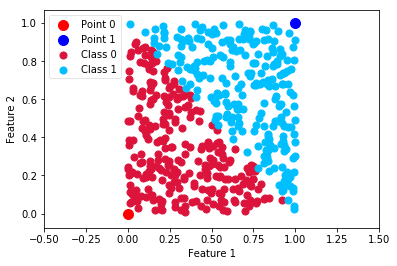

In [17]:
from templateTransformer import TemplateClassifier

X = [[0, 0], [1, 1]]
y = [0, 1]
clf = TemplateClassifier()
clf.fit(X, y)

rng = np.random.RandomState(13)
X_test = rng.rand(500, 2)
y_pred = clf.predict(X_test)

X_0 = X_test[y_pred == 0]
X_1 = X_test[y_pred == 1]


p0 = plt.scatter(0, 0, c='red', s=100)
p1 = plt.scatter(1, 1, c='blue', s=100)

ax0 = plt.scatter(X_0[:, 0], X_0[:, 1], c='crimson', s=50)
ax1 = plt.scatter(X_1[:, 0], X_1[:, 1], c='deepskyblue', s=50)

leg = plt.legend([p0, p1, ax0, ax1],
                 ['Point 0', 'Point 1', 'Class 0', 'Class 1'],
                 loc='upper left', fancybox=True, scatterpoints=1)
leg.get_frame().set_alpha(0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-.5, 1.5])

plt.show()

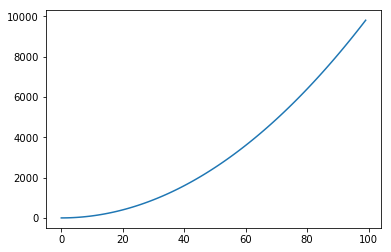

In [18]:
from templateTransformer import TemplateEstimator

X = np.arange(100).reshape(100, 1)
y = np.zeros((100, ))
estimator = TemplateEstimator()
estimator.fit(X, y)
plt.plot(estimator.predict(X))
plt.show()

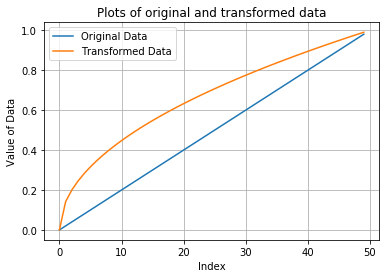

In [19]:
from templateTransformer import TemplateTransformer

X = np.arange(50, dtype=np.float).reshape(-1, 1)
X /= 50
estimator = TemplateTransformer()
X_transformed = estimator.fit_transform(X)

plt.plot(X.flatten(), label='Original Data')
plt.plot(X_transformed.flatten(), label='Transformed Data')
plt.title('Plots of original and transformed data')

plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Value of Data')

plt.show()

In [106]:
idx = pd.MultiIndex.from_tuples([(1, u'one'), (1, u'two'),
                                  (2, u'one'), (2, u'two')],
                                  names=['foo', 'bar'])
print(idx)

idx.set_labels([[1,0,1,0], [0,0,1,1]], inplace=True)

print(idx)


MultiIndex(levels=[[1, 2], ['one', 'two']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['foo', 'bar'])
MultiIndex(levels=[[1, 2], ['one', 'two']],
           labels=[[1, 0, 1, 0], [0, 0, 1, 1]],
           names=['foo', 'bar'])


In [20]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

y = [1, 2, 6, 4, 2]
lb.fit_transform(y).shape

(5, 4)

In [6]:
print(np.array([0.0])/np.array([0.0]))

[ nan]


/home/rookstar/anaconda3/envs/altcoin/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [13]:
import datetime
import time
x = time.strptime('00:01:00,000'.split(',')[0],'%H:%M:%S')
datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

x= '5min'
pd.Timedelta('5min').total_seconds()

300.0